# Fadenkreuz

## 1. Find unique words per party and topic

In [1]:
import json
import tqdm
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### Load preprocessed data

In [2]:
with open('../data/speeches_preprocessed.json', 'r') as fp:
    data = json.load(fp)
reden = data.copy()

with open('../data/unique_words_per_party.json', 'r') as fp:
    data = json.load(fp)
uw_all = data.copy()

In [3]:
uw_all.keys()

dict_keys(['AfD', 'BÜNDNIS 90_DIE GRÜNEN', 'CDU_CSU', 'DIE LINKE', 'FDP', 'SPD'])

### Topic selection

In [4]:
members = ['Hansjörg Durz','Birke Bull-Bischoff','Stefan Kaufmann','Ernst Dieter Rossmann','Götz Frömming','Katja Suding','Kai Gehring','Tankred Schipanski','Saskia Esken','Oliver Kaczmarek','Nicola Beer','Anke Domscheit-Berg','Tabea Rößner','Manuel Höferlin','Sven Lehmann','Karamba Diaby','Susann Rüthrich','Katarina Barley','Sylvia Pantel','Johannes Huber','Katrin Werner','Grigorios Aggelidis','Katja Dörner','Martin Reichardt','Nadine Schön','Nicole Höchst','Stefan Schwartze','Norbert Müller','Uwe Schulz','Maik Beermann','Josephine Ortleb','Cornelia Möhring','Ulle Schauws','Silke Launert','Wiebke Esdar','Gülistan Yüksel','Matthias Seestern-Pauly','Marcus Weinberg','Martin Patzelt','Dagmar Schmidt','Anna Christmann','Uwe Kamann','Silvia Breher','Nicole Bauer','Leni Breymaier','Katrin Helling-Plahr','Annalena Baerbock','Petra Sitte','Mariana Iris Harder-Kühnel','Katja Mast','Roman Müller-Böhm','Doris Achelwilm','Yvonne Magwas','Sönke Rix','Ronja Kemmer','Margit Stumpp','Manja Schüle','Jens Brandenburg','Nicole Gohlke','Katrin Staffler','Beate Walter-Rosenheimer','Bettina Margarethe Wiesmann','Ulrike Bahr','Franziska Giffey','Anja Karliczek','Michaela Noll','Yasmin Fahimi','Melanie Bernstein','Stephan Albani','Marja-Liisa Völlers','Thomas Sattelberger','Dietlind Tiemann','René Röspel','Albert Rupprecht','Michael Espendiller','Joana Cotar','Mario Brandenburg','Volker Münz','Astrid Mannes','Ekin Deligöz','Stefan Sauer','Svenja Stadler','Swen Schulz','Kerstin Radomski','Johannes Steiniger','Caren Marks','Andreas Steier','Dieter Janecek','Sybille Benning','Thomas Rachel','Dorothee Bär','Frank Pasemann','Lars Klingbeil','Ingrid Pahlmann','Markus Paschke','Elvan Korkmaz-Emre','Charlotte Schneidewind-Hartnagel']
ids =[]


In [9]:
#ids = []


def filter_for(what, search_terms, speeches):
    filtered_speeches = []
    for speech in speeches:
        if ( speech[what] in set(search_terms) ):
            filtered_speeches.append(speech)
    filtered_speeches.sort(key = lambda x:x['date']) 
    return filtered_speeches

reden_selection = filter_for('name', members, reden)
reden = reden_selection
for rede in reden:
    rede['party']=rede['party'].replace(u'\xa0', u' ')
    rede['party']=rede['party'].replace(u'/', u'_')
len(reden)

3149

In [6]:
allwords = []

# prepare for per party counts
allwordsperparty = {
    'SPD':[],
    'FDP':[],
    'CDU_CSU':[],
    'DIE LINKE':[],
    'BÜNDNIS 90_DIE GRÜNEN':[],
    'AfD':[],
    'fraktionslos':[],
    'Bremen':[]   
}
        
#consider = ['PROPN']
#consider = ['ADJ']
consider = ['NOUN']
for rede in tqdm.tqdm(reden):
    rel_lemmata = [ ele for ex,ele in enumerate(rede['text_lem']) if rede['text_pos'][ex] in consider ]
    allwords.extend(rel_lemmata)
    allwordsperparty[rede['party']].extend(rel_lemmata)


100%|██████████| 3149/3149 [00:00<00:00, 11171.35it/s]


In [10]:
party = 'BÜNDNIS 90_DIE GRÜNEN'

SP = set(uw_all[party])
SLR = set(allwords)

print(len(SP.intersection( SLR ) ),len(SP),len(SLR),len(SP)+len(SLR))

#print(SP.intersection( SLR ))

utw = SP.intersection( SLR )

1543 11960 36105 48065


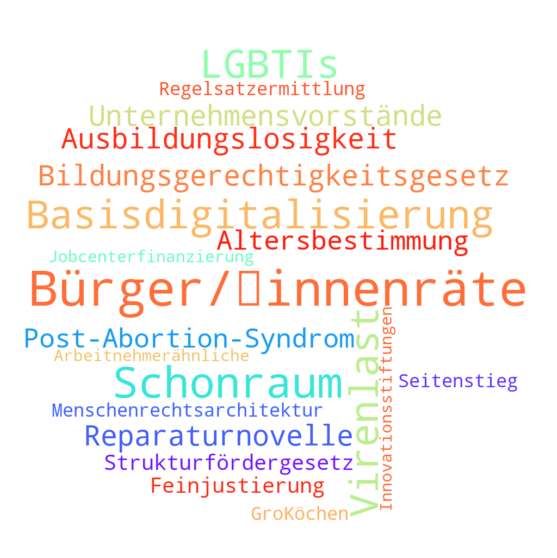

In [11]:
utw_counts = {}
party_counts = Counter(allwordsperparty[party])
for word in utw:
    utw_counts.update({ word : party_counts[word]})

#utw_counts = Counter(utw_list).most_common()
#print(utw_counts)

mask = np.array(Image.open("circle.png"))

wordcloud = WordCloud(width=800, height=800,background_color='white', max_words=20, mask=mask,contour_color='#000000',contour_width=0,colormap='rainbow').generate_from_frequencies(utw_counts)
#wordcloud = WordCloud(background_color='white', max_words=100, mask=mask).generate_from_frequencies(counts)

# create image as circle

fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# store to file
#party='DIE GRÜNEN'
#plt.savefig(f"../private/wordclouds/wordcloud_{party}.png", format="png")
#plt.savefig("circle", format="png")
plt.show()